In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH274 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_3_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced!<br>
<div/>

# CH274: Key Skills 3
## Functions, Code Design, and Linear Algebra

In this session, we are going to look at some more advanced features of the Python programming language, such as:
* How to write functions
* Methods to design a program with reusable code structures (aka functions)
* How to perform linear algebra operations with the numpy and scipy libraries
* How to not reinvent the wheel (using existing functions and libraries)

We will do this by writing a code that will solve a quantum mechanical problem: the particle in a box.

## Quick Recap from Key Skills 1 and Key Skills 2 (CH273)


* you've learned about the basics of phyton, variables, strings, printing




In [2]:
a = 1.0 + 2.0
b = 1 + 2
c = '1' + '2'
d = 1.0 + 2.0j # this is a complex number with a real part (1.0) and an imaginary part (2.0j)
print('float     integer    string     complex number')
print(a, ' | ', b,' | ', c,' | ', d)

float     integer    string     complex number
3.0  |  3  |  12  |  (1+2j)


* you've learned how to use numpy to define arrays and lists of numbers and to read in files



In [11]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8,9,10])
print('This is an array',x)
y = x*x # multiplies each value in x with itself and generates a new array
print('array enable element-wise multiplications')
print('x                                     x*x')
print(x, y)
data = np.loadtxt('STUFF/test.txt')
print(data) #2-dimensional array with 10 rows and 2 columns 
print('Columns and Rows: ', data.shape)
print('Carving out columns:')
print(data[:,0],data[:,1])
print('Carving out rows')
print(data[0,:],data[1,:])

This is an array [ 1  2  3  4  5  6  7  8  9 10]
array enable element-wise multiplications
x                                     x*x
[ 1  2  3  4  5  6  7  8  9 10] [  1   4   9  16  25  36  49  64  81 100]
[[   1.    1.]
 [   2.    4.]
 [   3.    9.]
 [   4.   16.]
 [   5.   25.]
 [   6.   36.]
 [   7.   49.]
 [   8.   64.]
 [   9.   81.]
 [  10.  100.]]
Columns and Rows:  (10, 2)
Carving out columns:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] [   1.    4.    9.   16.   25.   36.   49.   64.   81.  100.]
Carving out rows
[ 1.  1.] [ 2.  4.]


* you've learned how to iterate through arrays and lists with for-loops



In [15]:
index = 0
for x_val in x:
    y[index] = x_val*x_val
    index = index + 1
print(y)
    
#this can also be written in one line
y = np.array( [x_val*x_val for x_val in x] )
print(y)

[  1   4   9  16  25  36  49  64  81 100]
[  1   4   9  16  25  36  49  64  81 100]


* you've learned how to do basic plotting

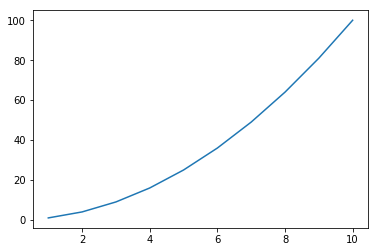

In [13]:
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

***

# The particle in a box in 1D (pib1d)
Here's a quick reminder of the particle in a box 


<div class="col-md-12">
                    </div>
                    <div class="col-md-12">
                    <div class="col-md-4">
                        <img src="STUFF/tik1d.png" alt="Motivation">
                    </div>
                    <div class="col-md-8">
                        <p>  Schrödinger equation (SE): $\hat{H}\psi = E\psi $</p>
                        <p class="">  
                        SE: action of energy operator $\hat{H}$ defines the energy and wave function $\psi$  </p>
                        <p class=""> $$ \hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V  $$</p>
                        <p class=" margin-top-10"> boundary conditions: $ \psi(0) = 0 \quad\text{and}\quad \psi(L) = 0 $</p>
                    </div>
                    </div>
                    <div class="col-md-6">
                        <p> wave functions</p> 
                        <p> $$ \psi_n(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi}{L}}  $$  </p>
                    </div>
                    <div class="col-md-6">
                        <p> energies </p>
                        <p> $$ E_n = \frac{\hbar^2\pi^2}{2m}\frac{n^2}{L^2}  $$  </p>
                    </div>

Our approach to **design a code** to calculate the wave functions and the energies shall be as follows:

(1) First we have to think carefully about what different building blocks we need. Each of these elements or building blocks could potentially be designed to be an independent piece of code that can be called as often as we want (This is what we call a **function**.) Functions allow us to package and reuse code without having to modify it. Look at the cells in the Recap section to see examples of non-reusable code (sometimes called 'spagetti' code) 

In the example of the pib1d, we need following building blocks
* a function that sets up the box along the $x$ axis (let's call this function ```make_xgrid```)
* a function that defines the potential and imposes the boundary condition (let's call this function ```potential```)
* a function that sets up the Hamiltonian (let's call this ```create_hamiltonian```)
* a function that diagonalises the SE: $\hat{H}\psi = E\psi $ to give us $E$ and $\psi$ (```diagonalise_H```)
* a function that plots $E(x)$ and $\psi(x)$ (```generate_plots```)



(2) Then we need to write and test these 5 functions. **Testing** is essential as it enables us to know which parts of the code operate as intended.

(3) At the end, when we know that all functions do what they are supposed to do, we write code (can be spagetti code or a function) that executes the functions in the right order. This is typically called the ```main``` or ```program```.



## How do Python functions work?



In [ ]:
def make_xgrid

## Computational Linear Algebra: Scipy and Numpy are your friends


## We need a plotting function

In [ ]:
# let's have a look...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

plt.plot(energy_levels[:,0], energy_levels[:,1], linewidth=2.5)
plt.plot(energy_levels[:,0], energy_levels[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Energy level n.',fontsize=14)
plt.ylabel('Energy [eV]',fontsize=14)

axes = plt.gca()
axes.set_xlim([1,n_levels+1])
#axes.set_ylim([ymin,ymax])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()

## Putting it all together - the `main program`

## Let's play with it!

## The power of reusable code - beyond the particle in a box

<div class=warn>
## Tasks
* Write down (in a Markdown cell) the expression for the electronic partition function of NO keeping into account the electronic ground state and the first excited state<br>
* Plot the value of the electronic partition function of NO as a function of temperature (best visualised if the temperature is rescaled in units of $k_BT/\Delta E$)<br>
* What values do you expect the electronic partition function of NO will assume at (a.) T=0 K and (b.) in the limit of incredibly high temperatures? Why?<br>
* Calculate the actual value of the the electronic partition function of NO at (a.) T=0 K and (b.) 10000 K. Does it make sense?
<div/>